In [1]:
pip install -U scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [2]:
from skmultiflow.data import ConceptDriftStream
from skmultiflow.meta import StreamingRandomPatchesClassifier
import matplotlib.pyplot as plt

In [29]:
stream = ConceptDriftStream(random_state=32,position=500,width=200)

### SRP WITH ADWIN

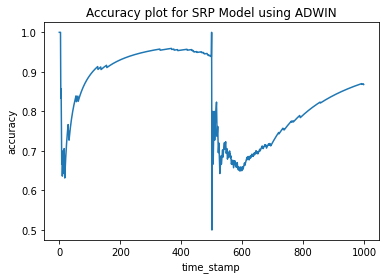

In [30]:
# Variables to control loop and track performance
srp = StreamingRandomPatchesClassifier(random_state=1,n_estimators=10)
n_samples = 0
correct_cnt = 0
max_samples = 1000
acc=[]
time=0
num=0
X_array=[]
Y_array=[]
# Run test-then-train loop for max_samples
# or while there is data in the stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    X_array.append(X)
    Y_array.append(y)
    y_pred = srp.predict(X)
    if(num==500):
      num=0
      correct_cnt=0
    if y[0] == y_pred[0]:
        correct_cnt += 1
    srp.partial_fit(X, y)
    time +=1
    n_samples+=1
    num+=1
    acc.append(correct_cnt/num)
# Plotting the accuracy after introducing drift
plt.plot(range(time),acc)
plt.xlabel('time_stamp')
plt.ylabel('accuracy')
plt.title('Accuracy plot for SRP Model using ADWIN')
plt.show()

SRP WITH EDDM

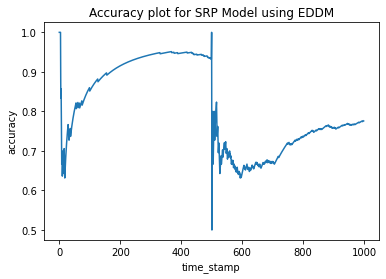

In [31]:
from skmultiflow.drift_detection.eddm import EDDM
eddm=EDDM()
srp = StreamingRandomPatchesClassifier(random_state=32,n_estimators=10,drift_detection_method=eddm)
n_samples = 0
correct_cnt = 0
max_samples = 1000
acc=[]
time=0
num=0
# Run test-then-train loop for max_samples
# or while there is data in the stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = X_array[n_samples],Y_array[n_samples]
    y_pred = srp.predict(X)
    if(num==500):
      num=0
      correct_cnt=0
    if y[0] == y_pred[0]:
        correct_cnt += 1
    srp.partial_fit(X, y)
    time +=1
    n_samples+=1
    num+=1
    acc.append(correct_cnt/num)
# Plotting the accuracy after introducing drift
plt.plot(range(time),acc)
plt.xlabel('time_stamp')
plt.ylabel('accuracy')
plt.title('Accuracy plot for SRP Model using EDDM')
plt.show()

### SRP with HDDM_W

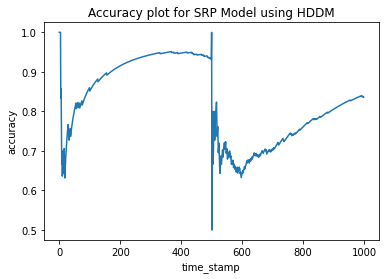

In [32]:
from skmultiflow.drift_detection.hddm_w import HDDM_W
hddm_w = HDDM_W()
srp = StreamingRandomPatchesClassifier(random_state=32,n_estimators=10,drift_detection_method=hddm_w)
n_samples = 0
correct_cnt = 0
max_samples = 1000
acc=[]
time=0
num=0
# Run test-then-train loop for max_samples
# or while there is data in the stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = X_array[n_samples],Y_array[n_samples]
    y_pred = srp.predict(X)
    if(num==500):
      num=0
      correct_cnt=0
    if y[0] == y_pred[0]:
        correct_cnt += 1
    srp.partial_fit(X, y)
    time +=1
    n_samples+=1
    num+=1
    acc.append(correct_cnt/num)
# Plotting the accuracy after introducing drift
plt.plot(range(time),acc)
plt.xlabel('time_stamp')
plt.ylabel('accuracy')
plt.title('Accuracy plot for SRP Model using HDDM')
plt.show()
